# 14.0简介

核心知识点
- 基于树的算法是一类流行且应用广泛的非参数有监督学习算法，可同时用于分类和回归任务。

- 这类算法的基础是决策树，包含决策规则、决策节点、叶子节点等核心概念，可解释性极强。

- 从决策树可以扩展出随机森林、堆叠模型等更复杂的集成方法。

- 本章主要围绕基于树的模型，讲解其训练、处理、调整、可视化和评估方法

# 14.1 训练决策树分类器

In [5]:
# 加载库
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

# 加载数据
iris = datasets.load_iris()
features = iris.data
target = iris.target

# 创建决策树分类器对象
decisiontree = DecisionTreeClassifier(random_state=0)

# 训练模型
model=decisiontree.fit(features, target)

In [7]:
# 预测与概率输出
observation = [[5, 4, 3, 2]]
model.predict(observation)  # 预测类别

array([1])

In [8]:
model.predict_proba(observation)  # 预测各类别概率

array([[0., 1., 0.]])

In [9]:
# 使用熵作为不纯度度量
decisiontree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0)
model_entropy = decisiontree_entropy.fit(features, target)

# 核心知识点

## 决策树原理
决策树通过寻找能最大程度降低数据**不纯度**的规则来分裂节点。

## 不纯度度量
### 基尼不纯度（默认）
$$
G(t) = 1 - \sum_{i=1}^C p_i^2
$$

### 信息熵（熵不纯度）
$$
H(t) = -\sum_{i=1}^C p_i \log_2 p_i
$$

**参数设置**：
- 可通过 `criterion` 参数选择"基尼"或"熵"作为不纯度度量
- 默认使用**基尼不纯度**

## 决策树方法
- 模型训练用 `fit()`
- 预测用 `predict()`
- 获取类别概率用 `predict_proba()`

---

## 不纯度公式详解
| 符号 | 含义 |
|------|------|
| $G(t)$ | 节点 $t$ 的基尼不纯度 |
| $H(t)$ | 节点 $t$ 的信息熵 |
| $p_i$ | 节点 $t$ 中属于类别 $i$ 的样本比例 |
| $C$ | 总类别数 |

## 示例计算
假设节点中有两类样本：
- 类别1：70%（$p_1=0.7$）
- 类别2：30%（$p_2=0.3$）

**基尼不纯度**：
$$
G = 1 - (0.7^2 + 0.3^2) = 1 - (0.49 + 0.09) = 0.42
$$

**信息熵**：
$$
H = -(0.7 \times \log_2 0.7 + 0.3 \times \log_2 0.3) \approx -(0.7 \times -0.514 + 0.3 \times -1.737) \approx 0.881
$$

---

## 两种不纯度度量的比较
| 特征 | 基尼不纯度 | 信息熵 |
|------|-----------|--------|
| **计算速度** | 更快（无对数运算） | 较慢（需要计算对数） |
| **结果相似度** | 通常与熵的结果相似 | 更偏向于产生平衡的树 |
| **默认选择** | sklearn决策树默认选项 | 需要显式指定 |
| **数值范围** | $[0, 0.5]$（二分类） | $[0, 1]$（二分类） |

# 14.2 训练决策树回归模型

In [10]:
# 加载库
from sklearn.tree import DecisionTreeRegressor
import numpy as np  # 新增：用于加载本地数据

# 加载本地数据集
data = np.loadtxt("housing.data.txt")

# 分离特征和目标（前13列是特征，最后1列是房价）
features = data[:, 0:2]
target = data[:, 13]     # 第14列（索引13）是目标房价

# 创建决策树回归模型对象
decisiontree = DecisionTreeRegressor(random_state=0)

#训练模型
model = decisiontree.fit(features, target)

In [11]:
# 预测
observation = [[0.02, 16]]
model.predict(observation)

array([33.])

# 核心知识点

## 决策树回归分裂标准

- 决策树回归默认用 **均方误差 (MSE)**：
  $$ MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 $$
  作为分裂标准，也可选择平均绝对误差（MAE）：
  $$ MAE = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i| $$

- 与分类树的API设计保持一致，使用 `DecisionTreeRegressor` 实现

## 两种误差指标对比
| 特征 | 均方误差 (MSE) | 平均绝对误差 (MAE) |
|------|---------------|-------------------|
| **公式** | $\frac{1}{n} \sum (y_i - \hat{y}_i)^2$ | $\frac{1}{n} \sum \|y_i - \hat{y}_i\|$ |
| **对异常值的敏感度** | 高（平方会放大异常值影响） | 低（绝对值的鲁棒性更好） |
| **梯度** | 连续可导 | 在零点不可导 |
| **sklearn参数值** | `criterion='squared_error'` | `criterion='absolute_error'` |


# 14.3 可视化决策树模型

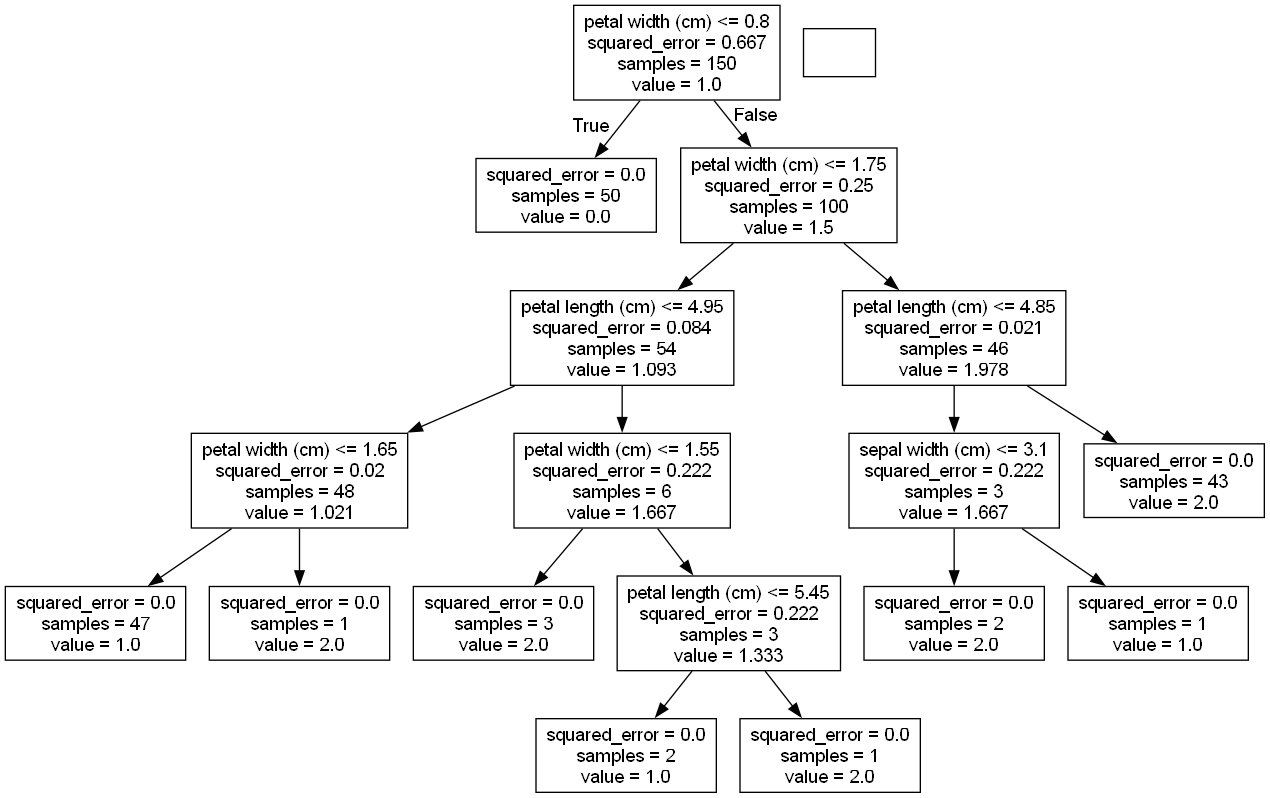

In [14]:
# 加载库
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image
from sklearn import tree

# 加载数据
iris = datasets.load_iris()
features = iris.data
target = iris.target

# 创建决策树分类器对象
model = decisiontree.fit(features, target)

# 创建DOT数据
dot_data = tree.export_graphviz(decisiontree,
                                out_file=None,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names)

# 绘制图形
graph = pydotplus.graph_from_dot_data(dot_data)

# 显示图形
Image(graph.create_png())

In [15]:
# 导出为PDF/PNG文件
graph.write_pdf("iris.pdf")

True

In [16]:
graph.write_png("iris.png")

True

核心知识点
- 决策树可导出为 DOT格式（一种图形描述语言），并通过 `pydotplus` 生成可视化图形。

- 可视化能直观展示决策规则、节点不纯度、样本分布等信息，是决策树可解释性的核心体现。

- macOS用户需额外安装 `GraphViz`（通过 `brew install graphviz`）才能运行此代码。

# 14.4 训练随机森林分类器

In [17]:
# 加载库
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

# 加载数据
iris= datasets.load_iris()
features = iris.data
target = iris.target

# 创建随机森林分类器对象
randomforest = RandomForestClassifier(random_state=0,n_jobs=-1)

# 训练模型
model = randomforest.fit(features, target)

In [18]:
# 预测
observation = [[5, 4, 3, 2]]
model.predict(observation)

array([1])

In [19]:
# 使用熵作为分裂标准
randomforest_entropy = RandomForestClassifier(criterion="entropy", random_state=0)
model_entropy = randomforest_entropy.fit(features, target)

核心知识点
- 随机森林是集成学习方法，通过训练多棵决策树并投票来解决单棵决策树的过拟合问题。

- 每棵树使用自助采样（有放回抽样）的样本，并在每个节点仅考虑特征的一个子集。

- 关键参数：`max_features`（每个节点考虑的最大特征数）、`bootstrap`（是否使用自助采样）、`n_estimators`（树的数量）、`n_jobs`（并行计算的CPU核数）。

# 14.5 训练随机森林模型

In [20]:
# 加载库
from sklearn.ensemble import RandomForestRegressor
import numpy as np  # 新增：用于加载本地数据

# 加载本地数据集
data = np.loadtxt("housing.data.txt")

# 分离特征和目标（前13列是特征，最后1列是房价）
features = data[:, 0:2]
target = data[:, 13]     # 第14列（索引13）是目标房价

# 创建随机森林回归模型
randomforest = RandomForestRegressor(random_state=0,n_jobs=-1)

# 训练模型
model = randomforest.fit(features, target)

核心知识点
- 随机森林回归的原理与分类器类似，同样使用自助采样和特征子集。

- 关键参数与分类器基本一致，包括 `max_features`、`bootstrap`、`n_estimators` 等。

- 使用 `RandomForestRegressor` 实现，API设计与分类器保持一致。

# 14.6 识别随机森林中的重要特征

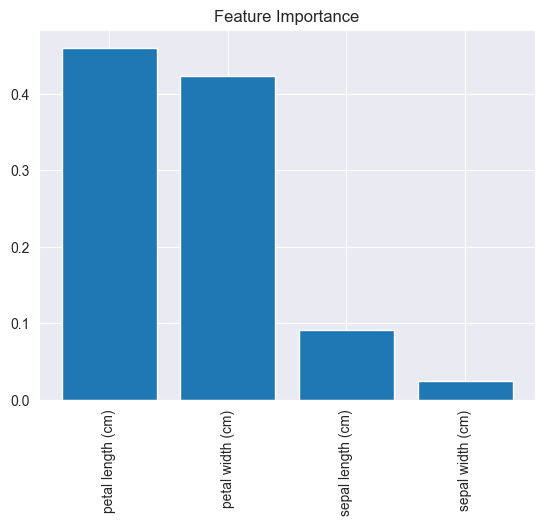

In [21]:
# 加载库
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

# 加载数据
iris = datasets.load_iris()
features = iris.data
target = iris.target

# 创建随机森林分类器对象
randomforest = RandomForestClassifier(random_state=0,n_jobs=-1)

# 训练模型
model = randomforest.fit(features, target)

# 计算特征的重要性
importances = model.feature_importances_

# 将特征的重要性按降序排列
indices = np.argsort(importances)[::-1]

# 将特征的重要性对特征名称重新排序
names = [iris.feature_names[i] for i in indices]

# 创建图
plt.figure()

# 创建图标题
plt.title('Feature Importance')

# 添加数据条
plt.bar(range(features.shape[1]), importances[indices])

# 将特征名称添加为X轴标签
plt.xticks(range(features.shape[1]), names,rotation=90)

# 显示图
plt.show()

核心知识点
- 随机森林可通过 `feature_importances_` 属性输出特征重要性，表示该特征对降低节点不纯度的贡献程度。

- 特征重要性越高，说明该特征对模型预测的影响越大，可用于特征选择和模型解释。

- 特征重要性的本质是特征对降低节点不纯度（如基尼不纯度、熵、方差）的平均贡献。

- 注意事项：


  1. 标称型（nominal）分类特征经one-hot编码后，重要性会分散到各个二元特征上，导致原特征的重要性被稀释。

  2. 高度相关的特征中，一个特征的高重要性会使另一个的重要性显得较低，影响模型效果。

- 所有特征重要性分数之和为1。

In [22]:
# 查看特征的重要程度
model.feature_importances_

array([0.09090795, 0.02453104, 0.46044474, 0.42411627])

# 14.7 选择随机森林中的重要特征

In [23]:
# 加载库
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel

# 加载数据
iris = datasets.load_iris()
features = iris.data
target = iris.target

#创建随机森林分类器
randomforest = RandomForestClassifier(random_state=0,n_jobs=-1)

# 创建对象，选择重要性大于或等于阈值的特征
selector = SelectFromModel(randomforest, threshold=0.3)

# 使用选择器创建新的特征矩阵
features_important = selector.fit_transform(features, target)

# 使用重要的特征训练随机森林模型
model = randomforest.fit(features_important, target)

核心知识点
- 使用 `SelectFromModel` 可自动筛选出重要性大于等于阈值的特征，生成新的特征矩阵。

- 这种两步法（先训练模型确定重要性，再用重要特征重新训练）能减少特征数量，提升模型可解释性并降低方差。

# 14.8 处理不均衡的分类

In [24]:
# 加载库
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

# 加载数据
iris = datasets.load_iris()
features = iris.data
target = iris.target

# 删除前四十个样本以获得高度不均衡的数据
features = features[40:,:]
target = target[40:]

#创建目标向量表明分类是0还是1
target = np.where((target==0),0,1)

# 创建随机森林分类器
randomforest = RandomForestClassifier(random_state=0,n_jobs=-1,class_weight='balanced')

# 训练模型
model = randomforest.fit(features, target)


# 核心知识点

## 处理不均衡分类问题

- 不均衡分类会降低模型性能，可以使用 `class_weight="balanced"` 参数，根据各类别样本频率的倒数自动计算权重：

$$
w_j = \frac{n}{k \cdot n_j}
$$

其中：
- $n$ 是总样本数
- $k$ 是类别数
- $n_j$ 是第 $j$ 类的样本数

## 权重计算原理

- 该参数能增大稀有类别的权重，减小多数类别的权重，从而纠正数据不均衡问题


# 14.9 控制决策树的规模

In [25]:
# 加载库
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

# 加载数据
iris = datasets.load_iris()
features = iris.data
target = iris.target

# 创建决策器分类对象
decisiontree = DecisionTreeClassifier(random_state=0,
                                      max_depth=None,
                                      min_samples_split=2,
                                      min_samples_leaf=1,
                                      min_weight_fraction_leaf=0,
                                      max_leaf_nodes=None,
                                      min_impurity_decrease=0)

# 训练模型
model = decisiontree.fit(features, target)

核心知识点
- 关键参数：


  1. `max_depth`：限制树的最大深度，防止树过度生长（过拟合）。

  2. `min_samples_split`：节点分裂前必须包含的最小样本数。

  3. `min_samples_leaf`：叶子节点必须包含的最小样本数。

  4. `max_leaf_nodes`：限制叶子节点的最大数量。

- 通常调整 `max_depth` 和 `min_samples_split` 即可有效控制树的规模，较浅的树（树桩）方差更小。

# 14.10 通过boosting提高性能

In [27]:
# 加载库
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets

# 加载数据
iris = datasets.load_iris()
features = iris.data
target = iris.target

# 创建adaboost树分类器对象
adaboost = AdaBoostClassifier(random_state=0)

# 训练模型
model = adaboost.fit(features, target)

C:\Users\24677\anaconda3\envs\ml\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


核心知识点
- Boosting是一种集成学习方法，通过迭代训练一系列弱模型（通常是浅决策树/树桩），并为前一轮预测错误的样本分配更大权重，最终组合所有弱模型的预测。

- AdaBoost的关键参数：


  1. `base_estimator`：弱模型的学习算法（默认是决策树）。

  2. `n_estimators`：迭代训练的弱模型数量。

  3. `learning_rate`：每个弱模型的权重变化率（值越小训练越慢，但性能可能更好）。

# 14.11 使用袋外误差评估随机森林模型

In [28]:
# 加载库
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

# 加载数据
iris = datasets.load_iris()
features = iris.data
target = iris.target

# 创建随机数分类器对象
randomforest = RandomForestClassifier(random_state=0,n_estimators=1000,oob_score=True,n_jobs=-1)

# 训练模型
model = randomforest.fit(features, target)

# 查看袋外误差
randomforest.oob_score_

0.9533333333333334

核心知识点
- 随机森林中，每棵树使用自助采样（有放回抽样）的样本训练，未被选中的样本称为袋外（OOB）样本。

- OOB样本可作为天然的测试集，通过计算这些样本的预测误差得到袋外误差，可作为交叉验证的替代方案。

- 设置 `oob_score=True` 即可计算OOB分数，通过 `oob_score_` 属性获取。